## 전처리 과정 및 분석

### 데이터타입 분석

|no|Variable|Definition|Key|분석가 의견|
|--|--|--|--|--|
|1|_id|매물 각각에 대한 unique id||unique id이기에 유의미한 분석 불가|
|2|title|매물번호-매물 각각에 대한 unique id||상기동일|
|3|roomName|매물번호-매물 각각에 대한 unique id||상기동일, 위와 중복 데이터이므로 삭제|
|4|gender|매물의 성별구분 유무|공용|공용/여성전용/남성전용을 분리할 목적이었으나 '공용' 데이터만 있기에 열 삭제 가능|
|5|roomType|다인실 구분|'1인실', '그 외'|범주형 데이터 - 이후 숫자로 구분 필요|
|6|py|평수|1.99㎡~132㎡|명목형 데이터(string)이므로 ㎡ 삭제 후 float으로 변환 필요|
|7|deposit|매물의 보증금|10만원~3억만원|명목형 데이터(string)이므로 삭제 후 '만원'은 '', '억만원'은 0000로 변환 필요|
|8|rentFee|매물의 월세|12만원~280만원|명목형 데이터(string)이므로 '만원'을 ''로 변환 필요|
|9|region|매물의 주소||범주형데이터|
|10|roomOption|매물의 옵션||명목형 데이터 - 옵션 별로 구분 필요
|11|url|매물 정보를 담고 있는 url||명목형데이터-유의미한 분석 불가

### 데이터 전처리

In [32]:
import pandas as pd
df_cd = pd.read_csv('project_coliving.yous_dabang.csv')


In [33]:
df_cd_extract = df_cd[['title', 'roomType', 'py', 'deposit', 'rentFee', 'region', 'roomOption']] 
df_cd_extract

,title,roomType,py,deposit,rentFee,region,roomOption
0,매물번호 42074288,1인실,19.83㎡,1000만원,56만원,서울특별시 관악구 신림동,벽걸이형\n책상\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n전자레인지\n...
1,매물번호 42051547,그 외,26.32㎡,2000만원,75만원,서울특별시 강북구 수유동,벽걸이형\n침대\n신발장\n냉장고\n세탁기\n싱크대\n가스레인지\nTV\n
2,매물번호 41995067,그 외,26.32㎡,2000만원,75만원,서울특별시 강북구 수유동,벽걸이형\n신발장\n싱크대\n가스레인지\n무인택배함\n인터폰\nCCTV\n현관보안
3,매물번호 39924505,그 외,49.04㎡,2억9000만원,30만원,서울특별시 강서구 공항동,천장형\n식탁\n신발장\n싱크대\n인덕션\n화재경보기\n베란다\n무인택배함\n비디오...
4,매물번호 39874814,그 외,96.86㎡,1억5000만원,70만원,서울특별시 강서구 공항동,신발장\n싱크대\n가스레인지\n화재경보기\n베란다\n비디오폰\n인터폰\n카드키\nC...
...,...,...,...,...,...,...,...
549,매물번호 41950840,1인실,19.83㎡,1000만원,50만원,서울특별시 강서구 화곡동,벽걸이형\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n화재경보기\n인터폰\...
550,매물번호 42334987,그 외,48.45㎡,50만원,105만원,경기도 의왕시 월암동,신발장\n싱크대\n인덕션\n비디오폰\nCCTV\n현관보안
551,매물번호 42196226,1인실,23.14㎡,200만원,28만원,경기도 고양시 덕양구 화정동,벽걸이형\n신발장\n냉장고\n세탁기\n싱크대\n가스레인지\n
552,매물번호 42254016,1인실,25㎡,300만원,30만원,서울특별시 강서구 화곡동,벽걸이형\n냉장고\n세탁기\n싱크대\n가스레인지\n전자레인지\n


In [34]:
# py, deposit, rentFee 전처리
df_cd_extract['py'] = df_cd_extract['py'].str.slice(stop=-1)
df_cd_extract['py'] = df_cd_extract['py'].astype(float)
df_cd_extract['deposit'] = df_cd_extract['deposit'].str.replace('억만원', '0000')
df_cd_extract['deposit'] = df_cd_extract['deposit'].str.replace('만원', '')
df_cd_extract['deposit'] = df_cd_extract['deposit'].str.replace('억', '')
df_cd_extract['deposit_만'] = df_cd_extract['deposit'].astype(int)
df_cd_extract['rentFee'] = df_cd_extract['rentFee'].str.replace('만원', '')
df_cd_extract['rentFee_만'] = df_cd_extract['rentFee'].astype(int)

/tmp/ipykernel_30/2622039983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd_extract['py'] = df_cd_extract['py'].str.slice(stop=-1)
/tmp/ipykernel_30/2622039983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd_extract['py'] = df_cd_extract['py'].astype(float)
/tmp/ipykernel_30/2622039983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [35]:
df_cd_extract['deposit_만']

0       1000
1       2000
2       2000
3      29000
4      15000
       ...  
549     1000
550       50
551      200
552      300
553    19000
Name: deposit_만, Length: 554, dtype: int64

In [36]:
df_cd_extract['deposit_만'].describe().loc['25%'], df_cd_extract['deposit_만'].describe().loc['50%'], df_cd_extract['deposit_만'].describe().loc['75%'],df_cd_extract['deposit_만'].describe().loc['max']

(300.0, 1000.0, 2000.0, 30000.0)

In [66]:
import numpy as np
def deposit_cate(row):
    if  row < df_cd_extract['deposit_만'].describe().loc['25%'] :  
        return 0
    elif row < np.round(np.mean(df_cd_extract['deposit_만'].describe().loc['25%']+df_cd_extract['deposit_만'].describe().loc['min']),2) :
        return 1
    elif row < df_cd_extract['deposit_만'].describe().loc['50%']:
        return 2
    elif row < np.round(np.mean(df_cd_extract['deposit_만'].describe().loc['25%']+df_cd_extract['deposit_만'].describe().loc['50%']),2):
        return 3
    elif row < np.round(np.mean(df_cd_extract['deposit_만'].describe().loc['75%']+df_cd_extract['deposit_만'].describe().loc['50%']),2):
        return 4
    elif row < np.round(np.mean([df_cd_extract['deposit_만'].describe().loc['75%'],df_cd_extract['deposit_만'].describe().loc['max']]),2):
        return 5
    else :
        return 6

In [67]:
df_cd_extract['deposit_cate'] = df_cd_extract['deposit_만'].apply(deposit_cate)

In [39]:
print(df_cd_extract.columns)
df_cd_extract

Index(['title', 'roomType', 'py', 'deposit', 'rentFee', 'region', 'roomOption',
       'deposit_만', 'rentFee_만', 'deposit_cate'],
      dtype='object')


,title,roomType,py,deposit,rentFee,region,roomOption,deposit_만,rentFee_만,deposit_cate
0,매물번호 42074288,1인실,19.83,1000,56,서울특별시 관악구 신림동,벽걸이형\n책상\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n전자레인지\n...,1000,56,2
1,매물번호 42051547,그 외,26.32,2000,75,서울특별시 강북구 수유동,벽걸이형\n침대\n신발장\n냉장고\n세탁기\n싱크대\n가스레인지\nTV\n,2000,75,3
2,매물번호 41995067,그 외,26.32,2000,75,서울특별시 강북구 수유동,벽걸이형\n신발장\n싱크대\n가스레인지\n무인택배함\n인터폰\nCCTV\n현관보안,2000,75,3
3,매물번호 39924505,그 외,49.04,29000,30,서울특별시 강서구 공항동,천장형\n식탁\n신발장\n싱크대\n인덕션\n화재경보기\n베란다\n무인택배함\n비디오...,29000,30,4
4,매물번호 39874814,그 외,96.86,15000,70,서울특별시 강서구 공항동,신발장\n싱크대\n가스레인지\n화재경보기\n베란다\n비디오폰\n인터폰\n카드키\nC...,15000,70,3
...,...,...,...,...,...,...,...,...,...,...
549,매물번호 41950840,1인실,19.83,1000,50,서울특별시 강서구 화곡동,벽걸이형\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n화재경보기\n인터폰\...,1000,50,2
550,매물번호 42334987,그 외,48.45,50,105,경기도 의왕시 월암동,신발장\n싱크대\n인덕션\n비디오폰\nCCTV\n현관보안,50,105,0
551,매물번호 42196226,1인실,23.14,200,28,경기도 고양시 덕양구 화정동,벽걸이형\n신발장\n냉장고\n세탁기\n싱크대\n가스레인지\n,200,28,0
552,매물번호 42254016,1인실,25.00,300,30,서울특별시 강서구 화곡동,벽걸이형\n냉장고\n세탁기\n싱크대\n가스레인지\n전자레인지\n,300,30,1


In [54]:
from scipy import stats
# 세가지 연속형 변수 모두 정규분포를 따르지 않음.
w_statistic, p_value = stats.shapiro(df_cd_extract['deposit_만'].dropna())
print(f"W 통계량: {w_statistic}, p-value: {p_value}")
w_statistic, p_value = stats.shapiro(df_cd_extract['rentFee_만'].dropna())
print(f"W 통계량: {w_statistic}, p-value: {p_value}")
w_statistic, p_value = stats.shapiro(df_cd_extract['py'].dropna())
print(f"W 통계량: {w_statistic}, p-value: {p_value}")

W 통계량: 0.5072922886634719, p-value: 1.654206096528746e-36
W 통계량: 0.8337429320874595, p-value: 1.3796557016480063e-23
W 통계량: 0.8250411881365868, p-value: 3.975090426983875e-24


In [68]:
import numpy as np
def rentFee_cate(row):
    if  row < df_cd_extract['rentFee_만'].describe().loc['25%'] :  
        return 0
    elif row < np.round(np.mean(df_cd_extract['rentFee_만'].describe().loc['25%']+df_cd_extract['rentFee_만'].describe().loc['min']),2) :
        return 1
    elif row < df_cd_extract['rentFee_만'].describe().loc['50%']:
        return 2
    elif row < np.round(np.mean(df_cd_extract['rentFee_만'].describe().loc['25%']+df_cd_extract['rentFee_만'].describe().loc['50%']),2):
        return 3
    elif row < np.round(np.mean(df_cd_extract['rentFee_만'].describe().loc['75%']+df_cd_extract['rentFee_만'].describe().loc['50%']),2):
        return 4
    elif row < np.round(np.mean([df_cd_extract['rentFee_만'].describe().loc['75%'],df_cd_extract['rentFee_만'].describe().loc['max']]),2):
        return 5
    else :
        return 6

In [41]:
df_cd_extract['rentFee_cate'] = df_cd_extract['rentFee_만'].apply(rentFee_cate)

/tmp/ipykernel_30/1163450465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd_extract['rentFee_cate'] = df_cd_extract['rentFee_만'].apply(rentFee_cate)


In [42]:
df_cd_extract[['region_si', 'region_gu', 'region_dong']] = df_cd_extract['region'].str.split(' ', n=2, expand=True)

/tmp/ipykernel_30/3080069677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd_extract[['region_si', 'region_gu', 'region_dong']] = df_cd_extract['region'].str.split(' ', n=2, expand=True)


In [43]:
df_cd_extract.loc[df_cd_extract['region_si'].str.contains('서울'), 'region_si'] = '서울'
df_cd_extract.loc[df_cd_extract['region_si'].str.contains('경기'), 'region_si'] = '경기'
df_cd_extract.loc[df_cd_extract['region_si'].str.contains('인천'), 'region_si'] = '인천'

In [44]:
df_cd_extract_seoul = df_cd_extract.query('region_si=="서울"')

In [45]:
df_cd_extract_seoul.reset_index(inplace=True)

In [46]:
df_cd_extract.loc[df_cd_extract['roomType'].str.contains('1인실'), 'roomType_change'] = 0
df_cd_extract.loc[df_cd_extract['roomType'].str.contains('그 외'), 'roomType_change'] = 1

In [47]:
df_cd_extract

,title,roomType,py,deposit,rentFee,region,roomOption,deposit_만,rentFee_만,deposit_cate,rentFee_cate,region_si,region_gu,region_dong,roomType_change
0,매물번호 42074288,1인실,19.83,1000,56,서울특별시 관악구 신림동,벽걸이형\n책상\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n전자레인지\n...,1000,56,2,2,서울,관악구,신림동,0.0
1,매물번호 42051547,그 외,26.32,2000,75,서울특별시 강북구 수유동,벽걸이형\n침대\n신발장\n냉장고\n세탁기\n싱크대\n가스레인지\nTV\n,2000,75,3,3,서울,강북구,수유동,1.0
2,매물번호 41995067,그 외,26.32,2000,75,서울특별시 강북구 수유동,벽걸이형\n신발장\n싱크대\n가스레인지\n무인택배함\n인터폰\nCCTV\n현관보안,2000,75,3,3,서울,강북구,수유동,1.0
3,매물번호 39924505,그 외,49.04,29000,30,서울특별시 강서구 공항동,천장형\n식탁\n신발장\n싱크대\n인덕션\n화재경보기\n베란다\n무인택배함\n비디오...,29000,30,4,0,서울,강서구,공항동,1.0
4,매물번호 39874814,그 외,96.86,15000,70,서울특별시 강서구 공항동,신발장\n싱크대\n가스레인지\n화재경보기\n베란다\n비디오폰\n인터폰\n카드키\nC...,15000,70,3,3,서울,강서구,공항동,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,매물번호 41950840,1인실,19.83,1000,50,서울특별시 강서구 화곡동,벽걸이형\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n화재경보기\n인터폰\...,1000,50,2,2,서울,강서구,화곡동,0.0
550,매물번호 42334987,그 외,48.45,50,105,경기도 의왕시 월암동,신발장\n싱크대\n인덕션\n비디오폰\nCCTV\n현관보안,50,105,0,3,경기,의왕시,월암동,1.0
551,매물번호 42196226,1인실,23.14,200,28,경기도 고양시 덕양구 화정동,벽걸이형\n신발장\n냉장고\n세탁기\n싱크대\n가스레인지\n,200,28,0,0,경기,고양시,덕양구 화정동,0.0
552,매물번호 42254016,1인실,25.00,300,30,서울특별시 강서구 화곡동,벽걸이형\n냉장고\n세탁기\n싱크대\n가스레인지\n전자레인지\n,300,30,1,0,서울,강서구,화곡동,0.0


In [48]:
df_cd_extract['py'].describe().loc['25%'], df_cd_extract['py'].describe().loc['75%']

(19.83, 39.66)

In [69]:
def py_cate(row):
    if  row < df_cd_extract['py'].describe().loc['25%'] :  
        return 0
    elif row < np.round(np.mean(df_cd_extract['py'].describe().loc['25%']+df_cd_extract['py'].describe().loc['min']),2) :
        return 1
    elif row < df_cd_extract['py'].describe().loc['50%']:
        return 2
    elif row < np.round(np.mean(df_cd_extract['py'].describe().loc['25%']+df_cd_extract['py'].describe().loc['50%']),2):
        return 3
    elif row < np.round(np.mean(df_cd_extract['py'].describe().loc['75%']+df_cd_extract['py'].describe().loc['50%']),2):
        return 4
    elif row < np.round(np.mean([df_cd_extract['py'].describe().loc['75%'],df_cd_extract['py'].describe().loc['max']]),2):
        return 5
    else :
        return 6

In [70]:
df_cd_extract['py_cate']=df_cd_extract['py'].apply(py_cate)

In [71]:
df_cd_extract.query('region_si=="서울"')['region_dong'].unique()

array(['신림동', '수유동', '공항동', '하월곡동', '봉천동', '천호동', '가산동', '구의동', '서초동',
       '암사동', '반포동', '용답동', '합정동', '방학동', '문정동', '역삼동', '화곡동', '충현동',
       '자양동', '이문동', '석촌동', '면목동', '화양동', '당산동', '도림동', '번동', '하왕십리동',
       '사근동', '상봉동', '창동', '휘경동', '묵동', '신사동', '논현동', '회기동', '상도동', '창천동',
       '삼성동', '잠실동', '미아동', '중곡동', '효창동', '남현동', '방이동', '보문동', '목동',
       '둔촌동', '신대방동', '성내동', '망우동', '사당동', '공덕동', '양재동', '대치동', '연희동',
       '가락동', '동소문동', '정릉동', '공릉동', '성수동', '노량진동', '연남동', '구로동', '쌍문동',
       '능동', '전농동', '흑석동', '신길동', '일원동', '망원동', '상계동', '등촌동', '동선동',
       '문래동', '개봉동', '개포동', '삼선동'], dtype=object)

In [72]:
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('서초동 1445-1번지 외1필지','서초동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('충정로3가','충현동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('상도1동','상도동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('방이동 43-2, 1동','방이동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('보문동2가','보문동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('역삼동 830-41','역삼동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('동소문동1가','동소문동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('수유동 48-81','수유동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('당산동6가','당산동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('성수동2가','성수동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('수유동 229-18,51번지','수유동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('당산동6가','당산동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('성수동2가','성수동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('수유동 229-18,51번지','수유동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('잠실동 175-12','잠실동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('전농동 620-15번지 일대','전농동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('동선동4가','동선동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('성수동1가','성수동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('문래동3가','문래동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('삼선동5가','삼선동')

In [73]:
df_cd_extract['deposit_만']

0       1000
1       2000
2       2000
3      29000
4      15000
       ...  
549     1000
550       50
551      200
552      300
553    19000
Name: deposit_만, Length: 554, dtype: int64

## EDA: 계약기간에 따른 월세/보증금 평균
- 문제 정의: 서울의 구/동별 매물의 월세/보증금의 평균치를 계약기간 별로 도출한다.
- 배경: 월세/보증금의 평균치를 통해 고객의 n년 지출금액에 따라 지역을 추천하여, 고객의 매물 탐색 기간을 줄여 고객만족도를 높인다.
- 전제: py_cate ==1 or py_cate ==2 (py: 19.83-39.66 / 5.99-11.99평)인 경우 == 올라온 매물의 평수가 중위구간인 경우

In [74]:
df_rnt_dpst = df_cd_extract[['title','deposit_cate','rentFee_cate','region_si','region_gu','region_dong', 'py_cate']].query('region_si=="서울" and (py_cate==1 or py_cate==2  )').reset_index()
df_rnt_dpst = df_rnt_dpst.loc[:, ~df_rnt_dpst.columns.isin(['index', 'region_si','py_cate'])]

In [75]:
df_rnt_dpst

,title,deposit_cate,rentFee_cate,region_gu,region_dong
0,매물번호 42074288,3,2,관악구,신림동
1,매물번호 40548634,4,3,강서구,공항동
2,매물번호 40548634,4,3,강서구,공항동
3,매물번호 42057818,1,1,관악구,신림동
4,매물번호 42098168,5,2,관악구,신림동
...,...,...,...,...,...
88,매물번호 42039595,0,3,구로구,개봉동
89,매물번호 42039595,0,3,구로구,개봉동
90,매물번호 42028325,0,0,강북구,수유동
91,매물번호 41950840,3,2,강서구,화곡동


In [76]:
# 한글 폰트 설치
# !apt-get install -y fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# 코렙의 경우 설치 후 runtime  > restart 해야함

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

### 구별 예측

### 구별 보증금/월세 평균치 산출 with 계약기간 별 예상지출액

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
def cont_duration(x, gu_dong, gu) :

    
    if gu_dong == '구' :
        gu_dong_value = 'gu'
    elif gu_dong == '동' : 
        gu_dong_value = 'dong'

    df_cd_years = df_cd_extract.query('region_si=="서울" and (py_cate==1 or py_cate==2)')[[f'region_{gu_dong_value}', 'deposit_만', 'rentFee_만']]
    df_cd_years[f'{x}years'] = df_cd_years['deposit_만'] + x*12*df_cd_years['rentFee_만']
    

    if gu_dong == '동' and gu == '전체' : 
        df_cd_years = df_cd_extract.query('region_si=="서울" and (py_cate==1 or py_cate==2)')[[f'region_{gu_dong_value}', 'deposit_만', 'rentFee_만']]
        df_cd_years[f'{x}years'] = df_cd_years['deposit_만'] + x*12*df_cd_years['rentFee_만']
    elif gu_dong == '동' : 
        df_cd_years = df_cd_extract.query('region_si=="서울" and (py_cate==1 or py_cate==2)')[[f'region_{gu_dong_value}','region_gu', 'deposit_만', 'rentFee_만']]
        df_cd_years = df_cd_years.query(f'region_gu=="{gu}"')
        df_cd_years[f'{x}years'] = df_cd_years['deposit_만'] + x*12*df_cd_years['rentFee_만']

    gu_dong_list = df_cd_years[f'region_{gu_dong_value}'].unique().tolist()
    gu_dong_years_list = []
    for y in range(len(gu_dong_list)) : 
        gu_dong_years = np.round(np.median(df_cd_years.query(f"region_{gu_dong_value}=='{gu_dong_list[y]}'")[f'{x}years']),2)
        gu_dong_years_list.append(gu_dong_years)
        pass
    df_gu_dong_years=pd.DataFrame(data={f'region_{gu_dong_value}': gu_dong_list, f'{x}years':gu_dong_years_list})
    df_gu_dong_years = df_gu_dong_years.sort_values(f'{x}years', ascending=False)

    plt.figure(figsize=(30,5))
    sns.barplot(data=df_gu_dong_years, x=f'region_{gu_dong_value}', y=f'{x}years')
    plt.title(f'{gu_dong}별 {x}년 예상지출액 평균')
    plt.xlabel(f'{gu_dong}')
    plt.ylabel(f'{x}년 예상지출액 평균')
    plt.legend(fontsize = 10)
    return plt.show()
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


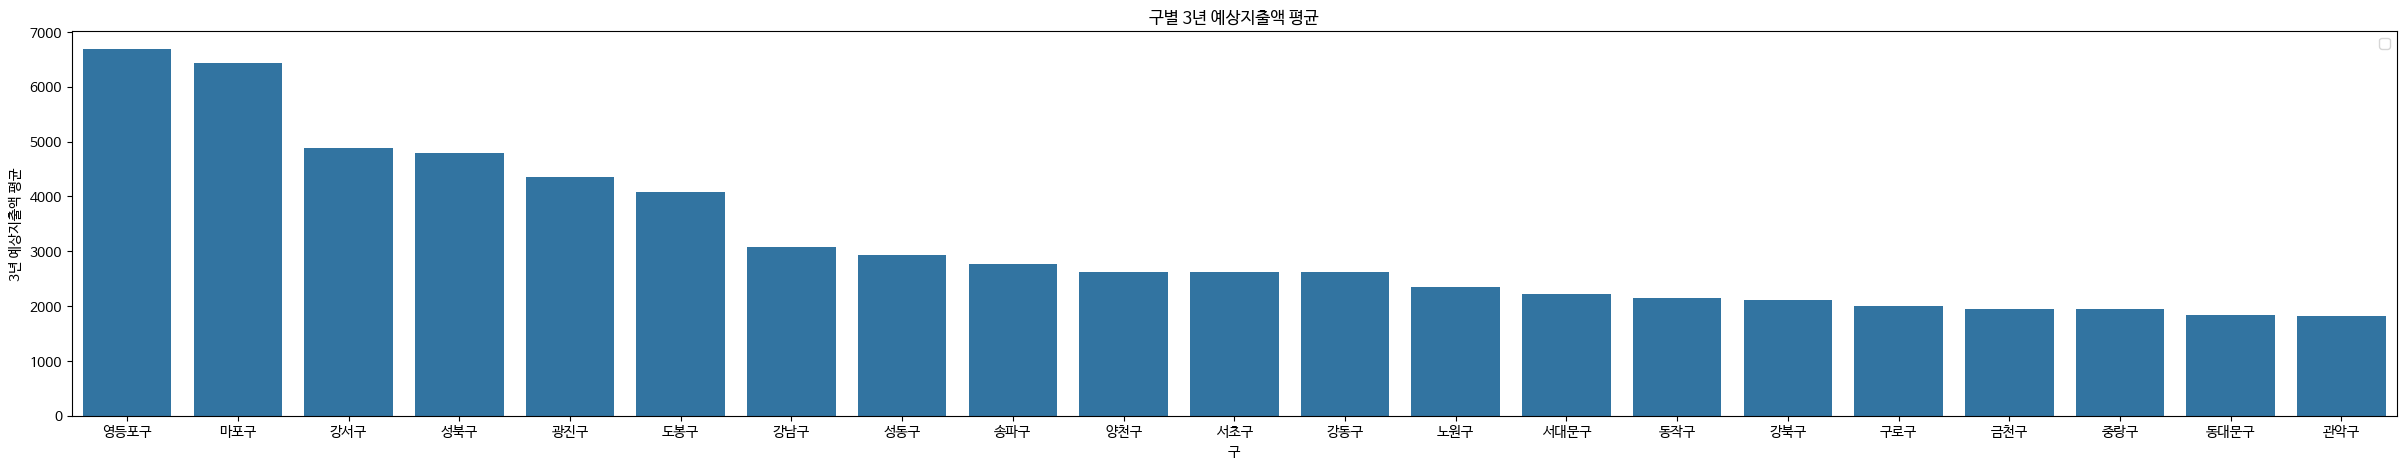

In [78]:
# user_input_year = input('계약기간이 몇년인가요? : ')
# user_input_year = int(user_input_year)
# user_input_gudong = input('어떤 기준으로 조회하고 싶으신가요?(구/동) : ')
# if user_input_gudong=='동' :
#     user_input_gu = input('어느 구에 있는 동을 조회하고 싶은가요?(nn구/전체) : ')
# else :
#     user_input_gu = 'null'

# cont_duration(user_input_year, user_input_gudong, user_input_gu)
cont_duration(3, '구', '전체')

### 구별 보증금/월세 평균치 산출 with 3년계약시 예상지출액

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


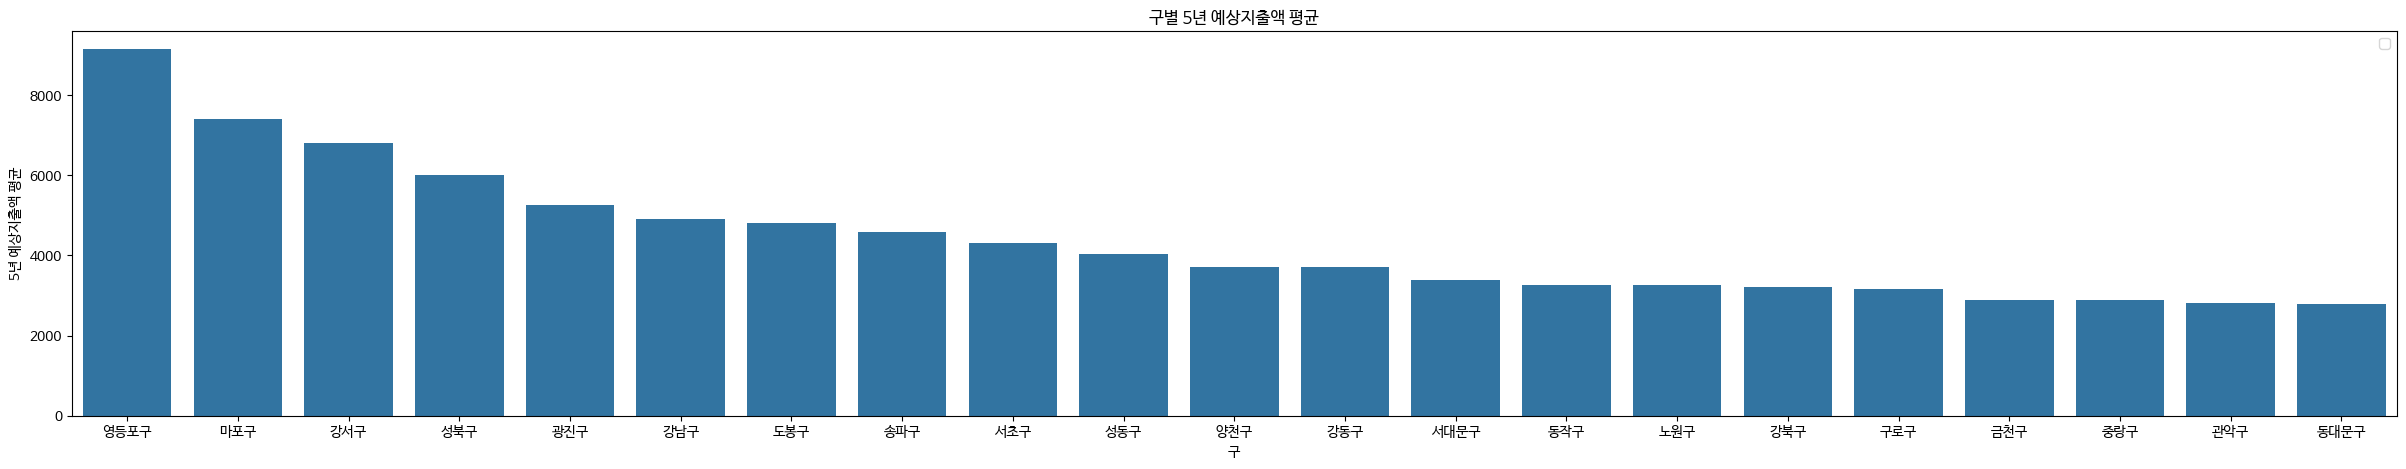

In [79]:
cont_duration(5, '구', '전체')

### 구별 보증금/월세 평균치 산출 with 7년계약시 예상지출액

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


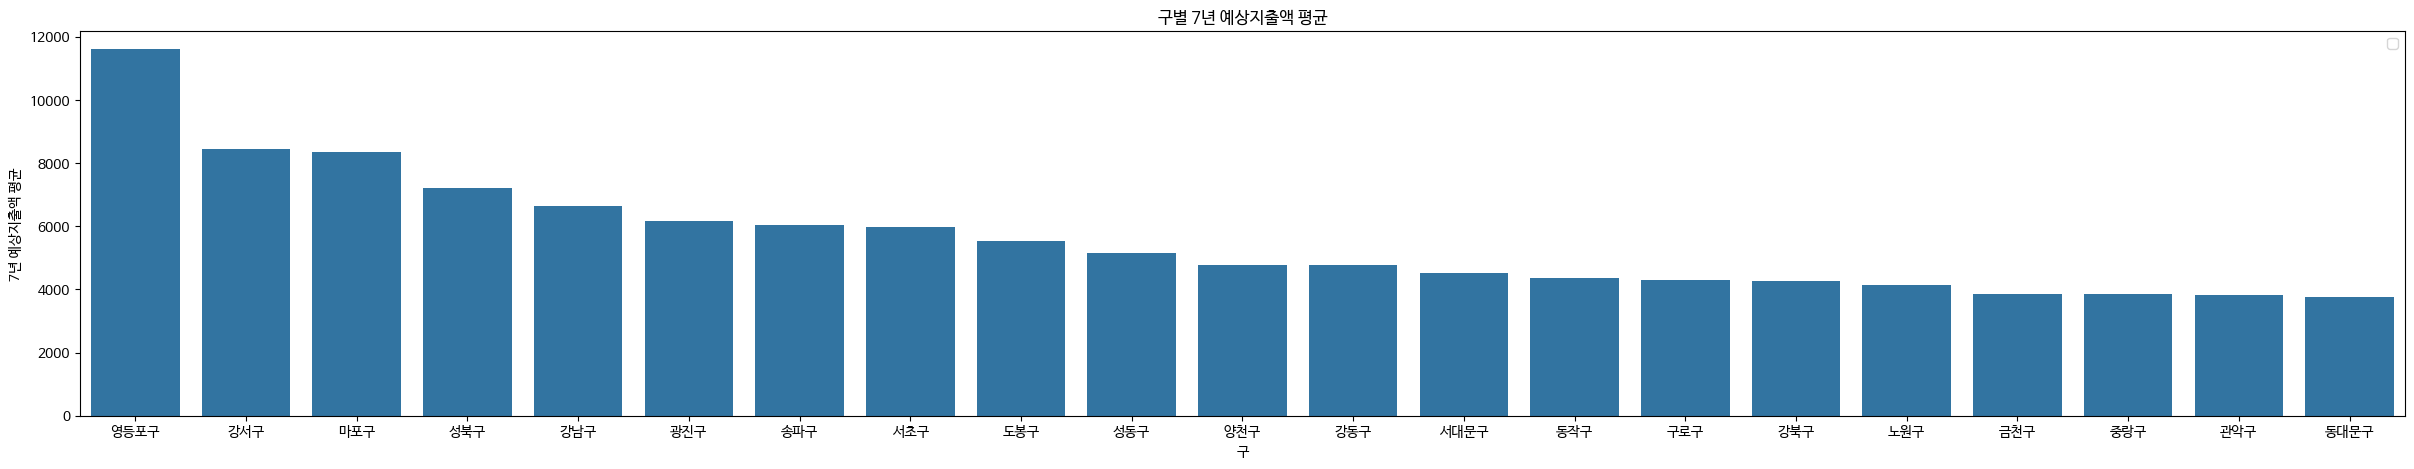

In [80]:
cont_duration(7, '구', '전체')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


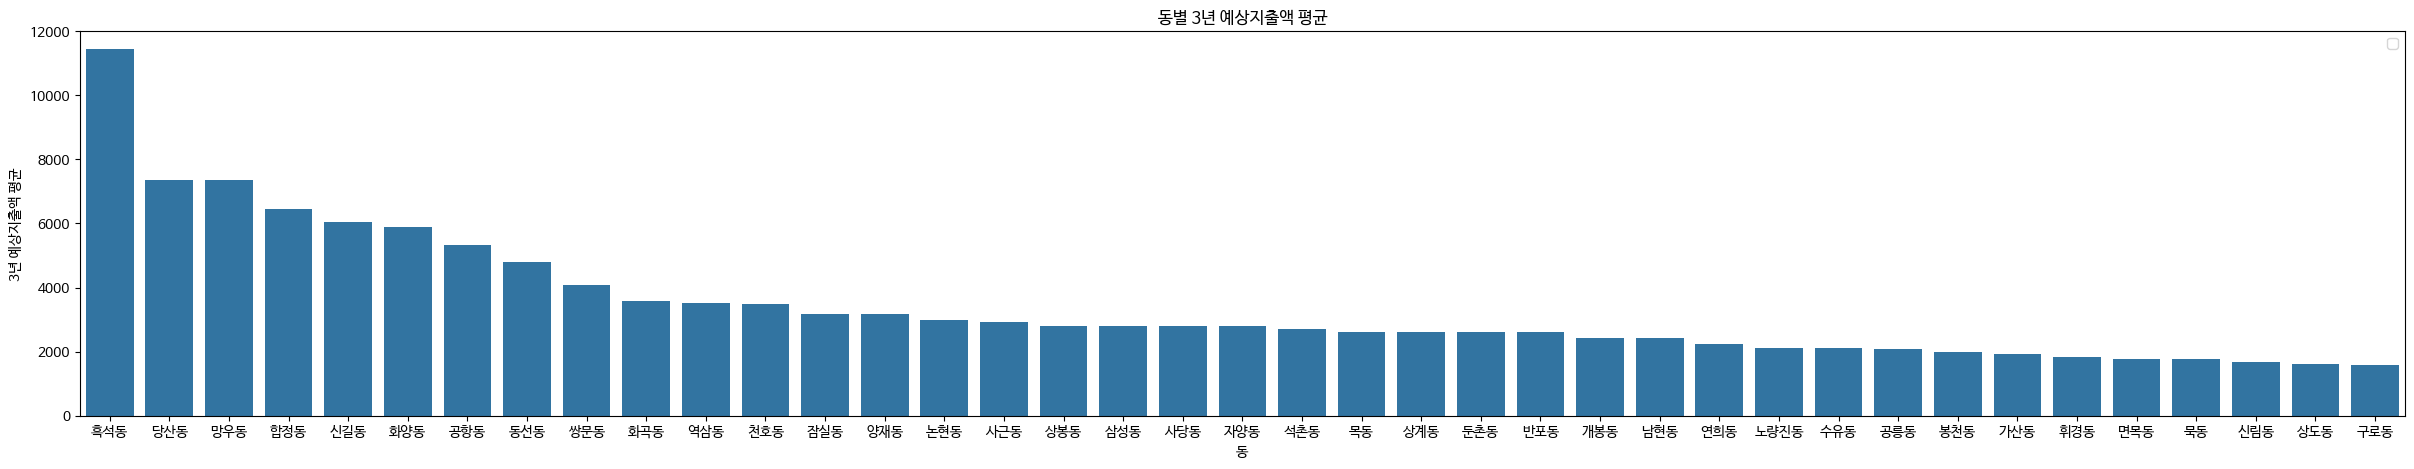

In [81]:

cont_duration(3, '동', '전체')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


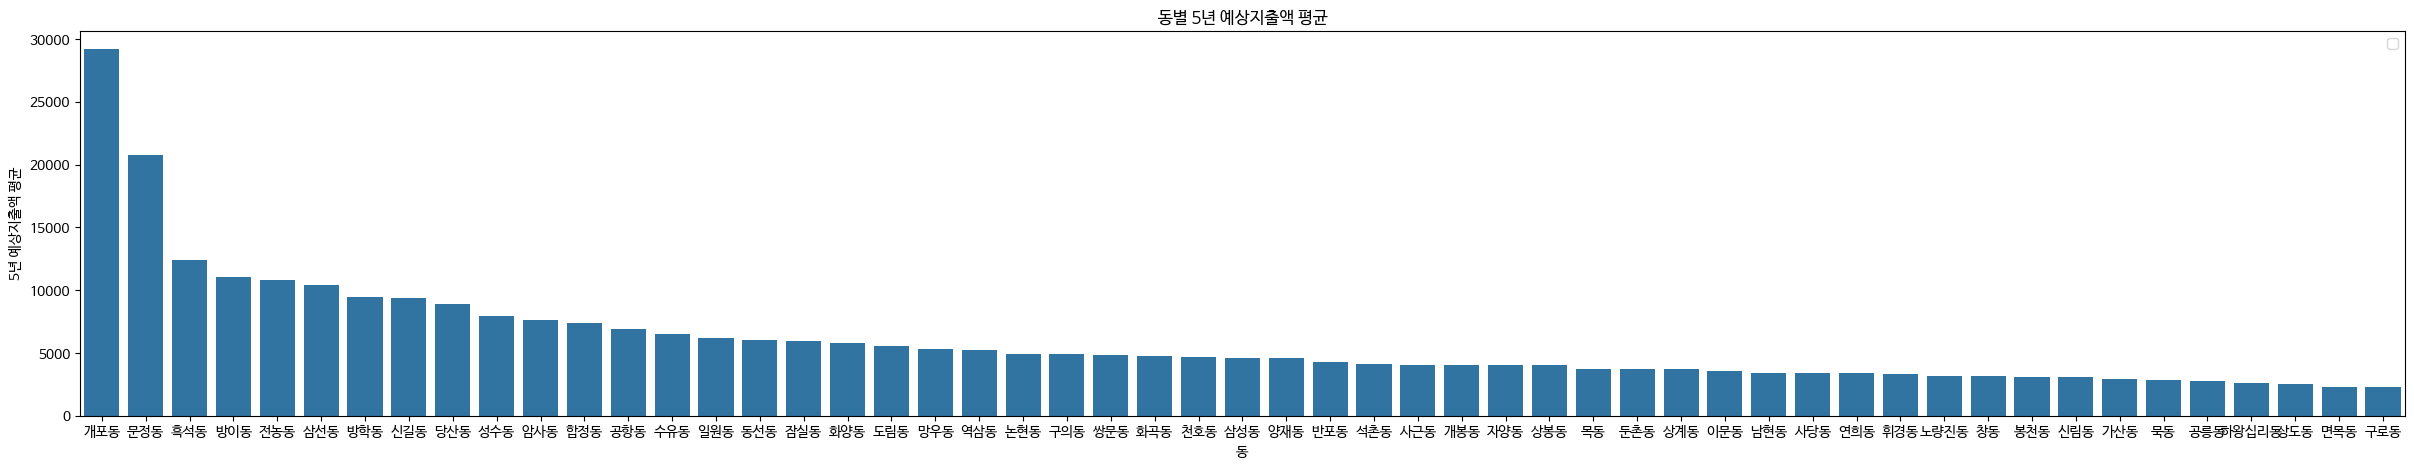

In [63]:
cont_duration(5, '동', '전체')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


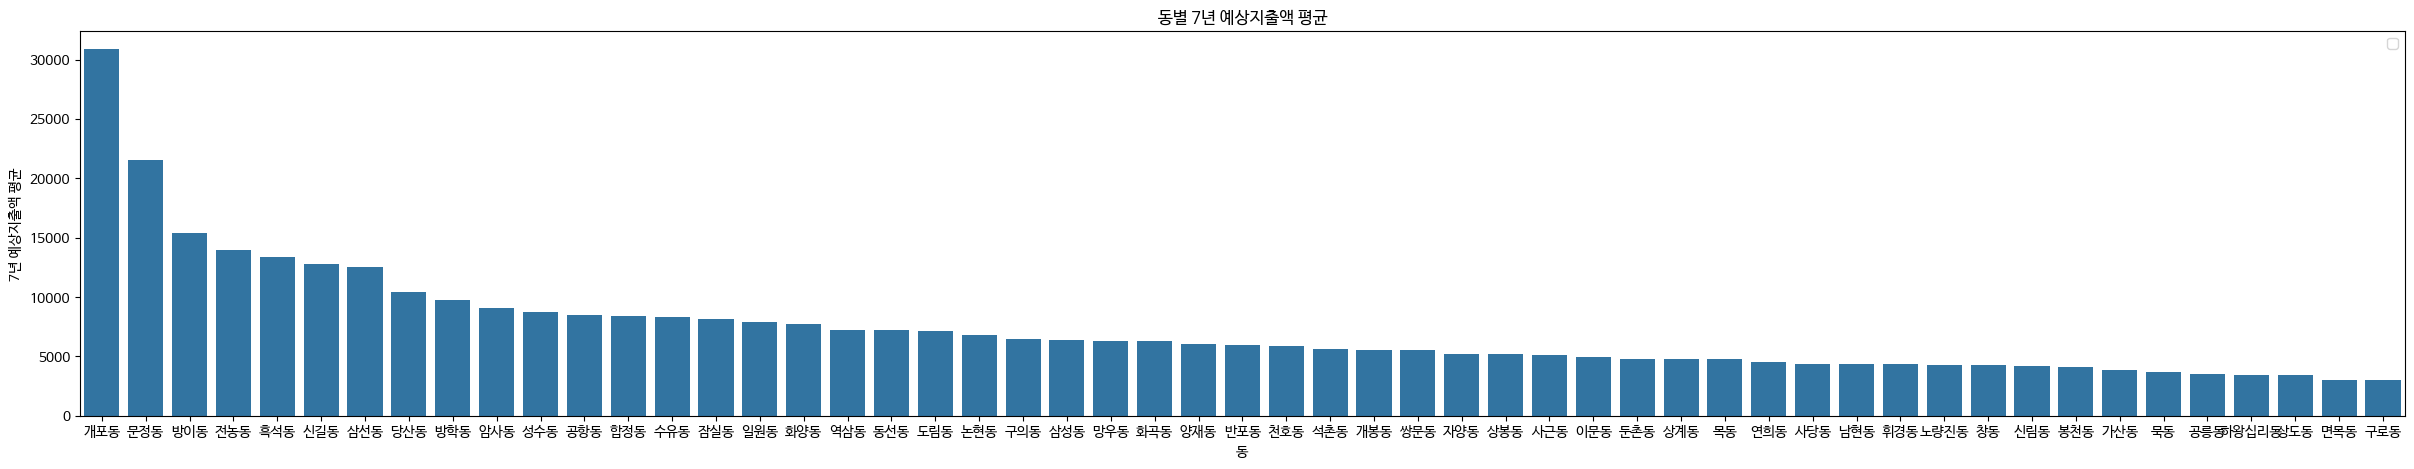

In [64]:
cont_duration(7, '동', '전체')

### 분석결과
##### 구 별로 봤을 때:
- 계약기간이 3년일 땐, 송파구/성북구/마포구의 예상지출액이 높은 것으로 보이며, 서대문구/구로구/금천구의 예상지출액이 낮은 것으로 보인다.
- 계약기간이 5년일 땐, 송파구/성북구/마포구의 예상지출액이 높은 것으로 보이며, 노원구/구로구/금천구의 예상지출액이 낮은 것으로 보인다.
- 계약기간이 7년일 땐, 송파구/성북구/영등포구의 예상지출액이 높은 것으로 보이며, 구로구/노원구/금천구의 예상지출액이 낮은 것으로 보인다.
##### 동 별로 봤을 때,
- 계약기간이 3년일 땐, 개포동/문정동/흑석동의 예상지출액이 높은 것으로 보이며, 면목동/상도동/구로동의 예상지출액이 낮은 것으로 보인다.
- 계약기간이 5년일 땐, 개포동/문정동/흑석동의 예상지출액이 높은 것으로 보이며, 상도동/면목동/구로동의 예상지출액이 낮은 것으로 보인다.
- 계약기간이 7년일 땐, 개포동/문정동/방이동의 예상지출액이 높은 것으로 보이며, 상도동/면목동/구로동의 예상지출액이 낮은 것으로 보인다.

##### 전체분석:
- 전체적으로 계약기간의 영향은 적은 것으로 보였다.
- 서대문구, 구로구, 금천구, 노원구의 예상지출액이 적은 것으로 보아, 해당 구의 보증금과 월세가 합리적일 것이다.
- 동 별로 봤을 때 상도동, 면목동, 구로동의 예상지출액이 낮으나, 상도동이 속한 동작구, 면목동이 속한 중랑구는 구별 예상지출액에서는 하위 6,7위 정도로 랭크되어 있기에 상도동과 면목동은 해당 구 내에서도 특히 합리적인 편으로 보인다.
- 하지만, 데이터셋의 크기가 작기 때문에, 구 별로 봤을 때의 결과가 더욱 신뢰도 있어 보인다. 